<a href="https://colab.research.google.com/github/mirchandani-mohnish/ClusterMetrics/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
from sklearn import datasets
import matplotlib.pyplot as plt
import kagglehub
import pandas as pd
import os
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import time

In [143]:
seed = 0

In [144]:
def percentage_similarity(base_array, sklearn_array):
    # Ensure both arrays have the same shape
    if base_array.shape != sklearn_array.shape:
        raise ValueError("Input arrays must have the same shape")
    cnt_sim = 0
    for i,x in enumerate(base_array):
      if x == sklearn_array[i]:
        cnt_sim += 1
    return cnt_sim * 100/ len(base_array)

In [145]:
def k_means(X, k, max_iter=300, tol=1e-4):

    # Step 1: Initialize centroids randomly from the dataset
    n_samples, n_features = X.shape
    rng = np.random.default_rng(seed)
    centroids = X[rng.choice(n_samples, k, replace=False)]

    for _ in range(max_iter):
        # Step 2: Assign each data point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        cluster_assignments = np.argmin(distances, axis=1)

        # Step 3: Compute new centroids
        new_centroids = np.array([X[cluster_assignments == j].mean(axis=0) if np.any(cluster_assignments == j) else centroids[j]
                                  for j in range(k)])

        # Step 4: Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return cluster_assignments, centroids


In [146]:
path = kagglehub.dataset_download("himanshunakrani/iris-dataset")
iris = pd.read_csv(os.path.join(path, "iris.csv"))
iris = iris.dropna()

iris_filtered = iris.select_dtypes(include=['float64'])

X_iris = iris_filtered.to_numpy()
k_iris = 3

print("Iris Dataset\n")

start_time = time.time()
labels_base_iris, centroids_base_iris = k_means(X_iris, k_iris)
print(f"Execution time (base): {time.time() - start_time} seconds")
print(f"Silhouette score (base): {silhouette_score(X_iris, labels_base_iris)}")

start_time = time.time()
kmeans_iris = KMeans(n_clusters=k_iris, random_state=seed).fit(X_iris)
labels_sklearn_iris = kmeans_iris.labels_
centroids_sklearn_iris = kmeans_iris.cluster_centers_
print(f"\nExecution time (sklearn): {time.time() - start_time} seconds")
print(f"Silhouette score (sklearn): {silhouette_score(X_iris, labels_sklearn_iris)}")
print(f"Percentage similarity (base vs. sklearn): {percentage_similarity(labels_base_iris, labels_sklearn_iris)}%")

Iris Dataset

Execution time (base): 0.001729726791381836 seconds
Silhouette score (base): 0.5525919445499757

Execution time (sklearn): 0.0027022361755371094 seconds
Silhouette score (sklearn): 0.5509643746707443
Percentage similarity (base vs. sklearn): 25.333333333333332%


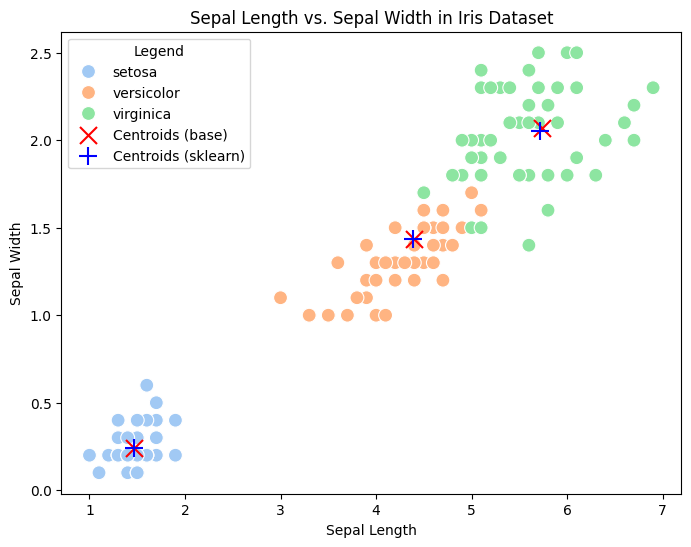

In [147]:
# centroids_base_iris = scaler_iris.inverse_transform(centroids_base_iris)
# centroids_sklearn_iris = scaler_iris.inverse_transform(centroids_sklearn_iris)

plength_idx = list(iris_filtered.columns).index("petal_length")
pwidth_idx = list(iris_filtered.columns).index("petal_width")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="species", palette="pastel", s=100)
plt.scatter(centroids_base_iris[:, plength_idx], centroids_base_iris[:, pwidth_idx], c='red', marker='x', s=150, label='Centroids (base)')
plt.scatter(centroids_sklearn_iris[:, plength_idx], centroids_sklearn_iris[:, pwidth_idx], c='blue', marker='+', s=150, label='Centroids (sklearn)')

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs. Sepal Width in Iris Dataset")
plt.legend(title="Legend")
plt.show()

In [148]:
from sklearn.preprocessing import OrdinalEncoder

path = kagglehub.dataset_download("katerynameleshenko/ai-index")
ai = pd.read_csv(os.path.join(path, "AI_index_db.csv"))
ai = ai.dropna()

ai["Total_score_Category"] = pd.cut(
    ai["Total score"],
    bins=[-float("inf"), 17.03, 26.91, float("inf")],
    labels=["Low", "Medium", "High"]
)
ai = ai.drop(columns=["Total score", "Country"])

ai_filtered = ai.drop(columns=["Total_score_Category"])

encoder = OrdinalEncoder()

categorical_cols = [col for col in ai_filtered.columns if ai_filtered[col].dtype not in [np.int64, np.float64]]
ai_filtered[categorical_cols] = encoder.fit_transform(ai_filtered[categorical_cols])

X_ai = ai_filtered.to_numpy()
k_ai = 3

print("AI Global Index")

start_time = time.time()
labels_base_ai, centroids_base_ai = k_means(X_ai, k_ai)
print(f"Execution time (base): {time.time() - start_time} seconds")
print(f"Silhouette score (base): {silhouette_score(X_ai, labels_base_ai)}")

start_time = time.time()
kmeans_ai = KMeans(n_clusters=k_ai, random_state=seed).fit(X_ai)
labels_sklearn_ai = kmeans_ai.labels_
centroids_sklearn_ai = kmeans_ai.cluster_centers_
print(f"\nExecution time (sklearn): {time.time() - start_time} seconds")
print(f"Silhouette score (sklearn): {silhouette_score(X_ai, labels_sklearn_ai)}")
print(f"Percentage similarity (base vs. sklearn): {percentage_similarity(labels_base_ai, labels_sklearn_ai)}%")

AI Global Index
Execution time (base): 0.001556396484375 seconds
Silhouette score (base): 0.26400961192188793

Execution time (sklearn): 0.0023512840270996094 seconds
Silhouette score (sklearn): 0.26400961192188793
Percentage similarity (base vs. sklearn): 54.83870967741935%


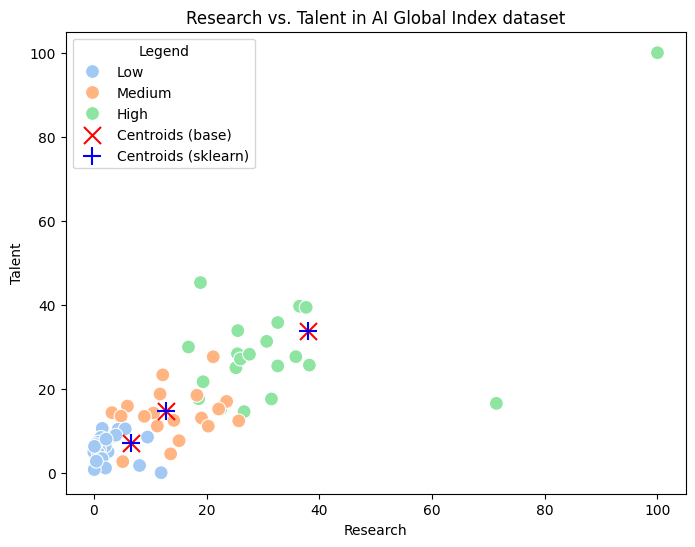

In [149]:
research_idx = list(ai_filtered.columns).index("Research")
talent_idx = list(ai_filtered.columns).index("Talent")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=ai, x="Research", y="Talent", hue="Total_score_Category", palette="pastel", s=100)
plt.scatter(centroids_base_ai[:, research_idx], centroids_base_ai[:, talent_idx], c='red', marker='x', s=150, label='Centroids (base)')
plt.scatter(centroids_sklearn_ai[:, research_idx], centroids_sklearn_ai[:, talent_idx], c='blue', marker='+', s=150, label='Centroids (sklearn)')

plt.xlabel("Research")
plt.ylabel("Talent")
plt.title("Research vs. Talent in AI Global Index dataset")
plt.legend(title="Legend")
plt.show()

In [150]:
from sklearn.preprocessing import OrdinalEncoder

path = kagglehub.dataset_download("shreyasur965/recent-earthquakes")
earthquakes = pd.read_csv(os.path.join(path, "earthquakes.csv"))

earthquakes = earthquakes.drop(columns=["id", "type", "title", "date", "time", "updated", "url",
                                        "detailUrl", "status", "net", "code", "ids", "sources",
                                        "types", "geometryType", "place", "placeOnly", "location", "subnational", "city",
                                        "locality", "postcode", "what3words", "timezone", "locationDetails", "continent", "country"])

earthquakes = earthquakes.dropna()
earthquakes_filtered = earthquakes.drop(columns=['alert'])

encoder = OrdinalEncoder()

categorical_cols = [col for col in earthquakes_filtered.columns if earthquakes_filtered[col].dtype not in [np.int64, np.float64]]
earthquakes_filtered[categorical_cols] = encoder.fit_transform(earthquakes_filtered[categorical_cols])

X_earth = earthquakes_filtered.to_numpy()
k_earth = 4

print("Global Earthquake Data")

start_time = time.time()
labels_base_earth, centroids_base_earth = k_means(X_earth, k_earth)
print(f"Execution time (base): {time.time() - start_time} seconds")
print(f"Silhouette score (base): {silhouette_score(X_earth, labels_base_earth)}")

start_time = time.time()
kmeans_earth = KMeans(n_clusters=k_earth, random_state=seed).fit(X_earth)
labels_sklearn_earth = kmeans_earth.labels_
centroids_sklearn_earth = kmeans_earth.cluster_centers_
print(f"\nExecution time (sklearn): {time.time() - start_time} seconds")
print(f"Silhouette score (sklearn): {silhouette_score(X_earth, labels_sklearn_earth)}")
print(f"Percentage similarity (base vs. sklearn): {percentage_similarity(labels_base_earth, labels_sklearn_earth)}%")

Global Earthquake Data
Execution time (base): 0.007131814956665039 seconds
Silhouette score (base): 0.9486280355356339

Execution time (sklearn): 0.004155874252319336 seconds
Silhouette score (sklearn): 0.9486280355356339
Percentage similarity (base vs. sklearn): 0.7853403141361257%


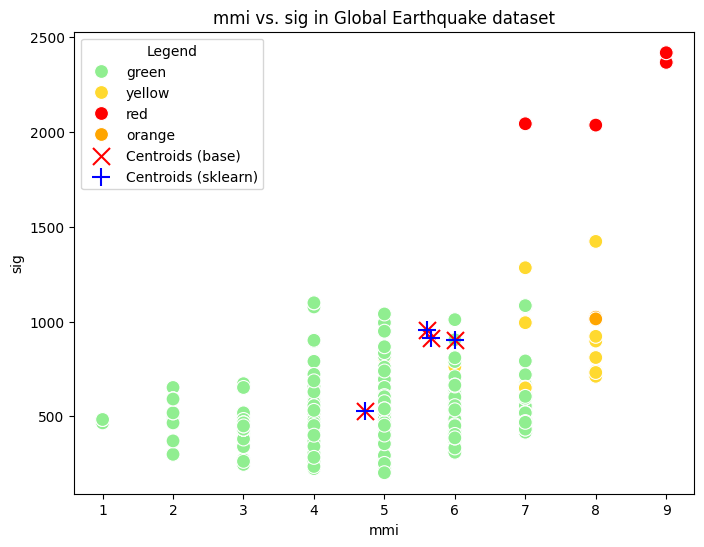

In [151]:
sig_idx = list(earthquakes_filtered.columns).index("sig")
mmi_idx = list(earthquakes_filtered.columns).index("mmi")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=earthquakes, x="mmi", y="sig", hue="alert", palette={"green": "lightgreen", "orange": "orange", "red": "red", "yellow": sns.color_palette("Set2")[-3]}, s=100)
plt.scatter(centroids_base_earth[:, mmi_idx], centroids_base_earth[:, sig_idx], c='red', marker='x', s=150, label='Centroids (base)')
plt.scatter(centroids_sklearn_earth[:, mmi_idx], centroids_sklearn_earth[:, sig_idx], c='blue', marker='+', s=150, label='Centroids (sklearn)')

plt.xlabel("mmi")
plt.ylabel("sig")
plt.title("mmi vs. sig in Global Earthquake dataset")
plt.legend(title="Legend")
plt.show()

In [152]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

encoder = OrdinalEncoder()

alert_encoded = encoder.fit_transform(earthquakes["alert"].to_frame())
selector = SelectKBest(score_func=mutual_info_classif, k=5)

X_earth = selector.fit_transform(earthquakes_filtered, alert_encoded.ravel())
k_earth = 4

print("Global Earthquake Data")

start_time = time.time()
labels_base_earth, centroids_base_earth = k_means(X_earth, k_earth)
print(f"Execution time (base): {time.time() - start_time} seconds")
print(f"Silhouette score (base): {silhouette_score(X_earth, labels_base_earth)}")

start_time = time.time()
kmeans_earth = KMeans(n_clusters=k_earth, random_state=seed).fit(X_earth)
labels_sklearn_earth = kmeans_earth.labels_
centroids_sklearn_earth = kmeans_earth.cluster_centers_
print(f"\nExecution time (sklearn): {time.time() - start_time} seconds")
print(f"Silhouette score (sklearn): {silhouette_score(X_earth, labels_sklearn_earth)}")
print(f"Percentage similarity (base vs. sklearn): {percentage_similarity(labels_base_earth, labels_sklearn_earth)}%")

Global Earthquake Data
Execution time (base): 0.005846261978149414 seconds
Silhouette score (base): 0.5681786658357089

Execution time (sklearn): 0.005287647247314453 seconds
Silhouette score (sklearn): 0.5681786658357089
Percentage similarity (base vs. sklearn): 0.0%


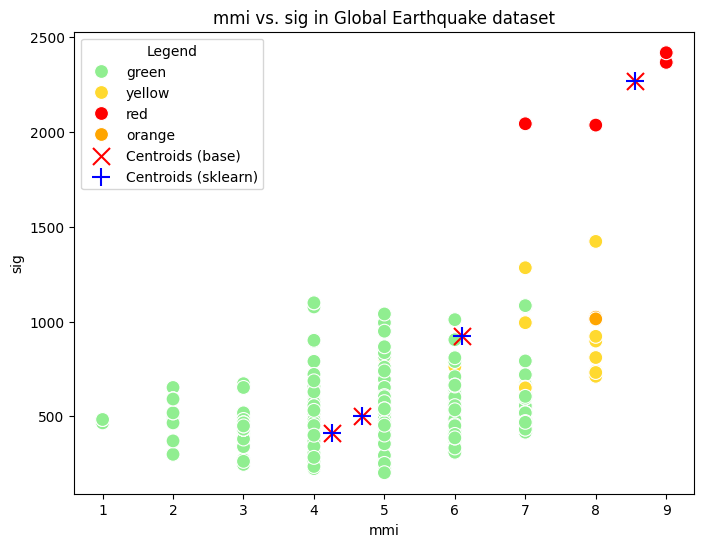

In [153]:
sig_idx = list(earthquakes_filtered.columns[selector.get_support()]).index("sig")
mmi_idx = list(earthquakes_filtered.columns[selector.get_support()]).index("mmi")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=earthquakes, x="mmi", y="sig", hue="alert", palette={"green": "lightgreen", "orange": "orange", "red": "red", "yellow": sns.color_palette("Set2")[-3]}, s=100)
plt.scatter(centroids_base_earth[:, mmi_idx], centroids_base_earth[:, sig_idx], c='red', marker='x', s=150, label='Centroids (base)')
plt.scatter(centroids_sklearn_earth[:, mmi_idx], centroids_sklearn_earth[:, sig_idx], c='blue', marker='+', s=150, label='Centroids (sklearn)')

plt.xlabel("mmi")
plt.ylabel("sig")
plt.title("mmi vs. sig in Global Earthquake dataset")
plt.legend(title="Legend")
plt.show()

In [154]:
scores = selector.scores_
feature_ranking = sorted(zip(earthquakes_filtered.columns, scores), key=lambda x: x[1], reverse=True)
top_features = [f[0] for f in feature_ranking[:5]]
print("Top 5 Features Sorted by Importance:", top_features)

Top 5 Features Sorted by Importance: ['sig', 'mmi', 'longitude', 'latitude', 'magnitude']
